# The Mandelbrot Set

In this notebook we plot the famous Mandelbrot set, and an alternative method of displaying it known as the Buddhabrot.
The Mandelbrot set $\mathcal{M}$ is defined by a set of sequences in the following way:

Take $c \in \mathbb{C}$. Let $z_0(c) = 0$ and for $n \in \mathbb{N}$, let $z_{n+1}(c) = z_n(c)^2 + c$. The Mandelbrot set is

$\mathcal{M} := \bigg\{ c \in \mathbb{C}\ : \  \big(z_n(c)\big)_{n \geq 0} \mathrm{\ \ is\ bounded}\bigg\} \subseteq \mathbb{C}$.

We can approximate $\mathcal{M}$  by noting that

$\mathcal{M} = \bigg\{ c \in \mathbb{C}\ : \  \big(z_n(c)\big)_{n \geq 0} \subseteq B(0,2) \bigg\} $,

where $B(0,2) := \big\{z \in \mathbb{C}\ : \ |z| \leq 2\big\}$.

Points outside the Mandelbrot set can be coloured by how long it takes them to escape $B(0,2)$, to give the plot in Figure 1. The number of iterations considered to approximate $n \to \infty$ is fixed as a large integer.

### Import libraries

In [19]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Choose parameters

In [56]:
# The total number of complex numbers considered (number of pixels) is n x n
n = 1000

# The maximum number of iterations in testing escape
maxiter = 500

# The plot size in inches
size = 15

### Generate the Mandelbrot set

In [57]:
xs = np.linspace(-2,1,n)
ys = np.linspace(-1.5,1.5,n)
Z0 = np.array(xs).reshape((1,n)) + np.array(ys).reshape((n,1))*1j
Z = np.zeros((n,n))
T = np.zeros((n,n))

for k in range(maxiter):
    Z = Z**2 + Z0
    T += np.int_(T==0) * (abs(Z) > 2) * k

### Plot the Mandelbrot set

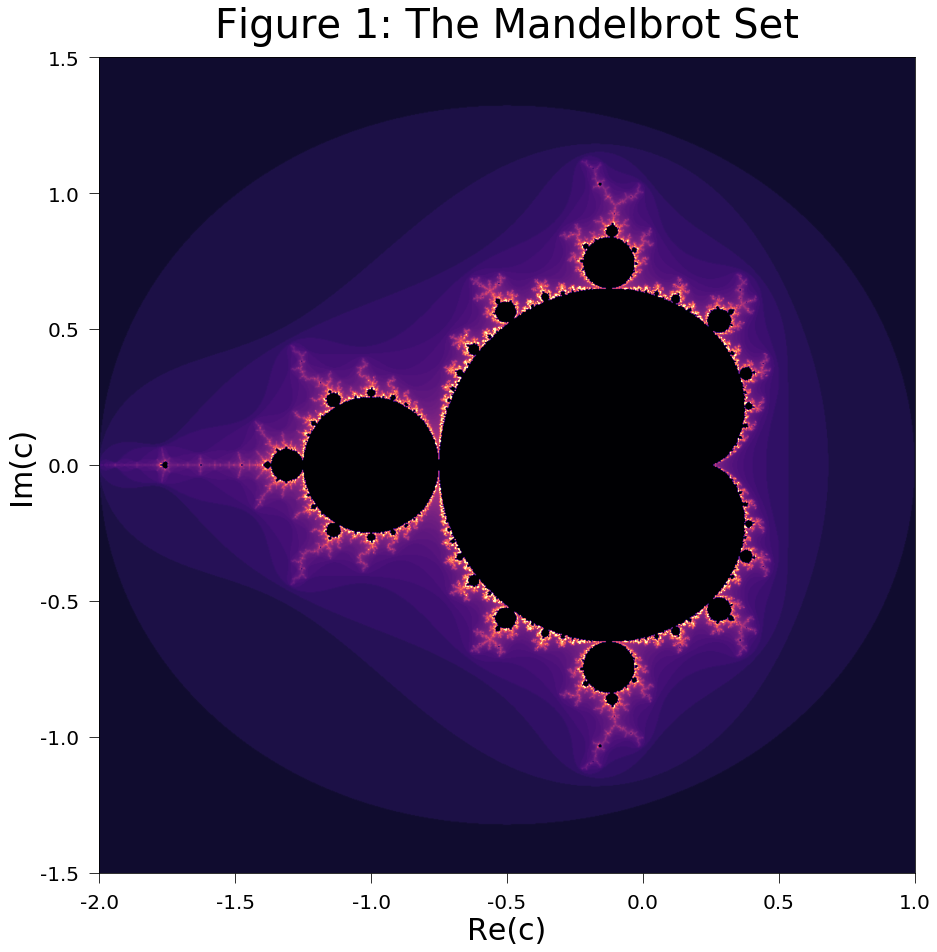

In [58]:
fig = plt.figure(figsize=(size,size))
plt.imshow(T**0.5,cmap='magma',interpolation='gaussian',aspect='equal',vmax=0.5*maxiter**0.5)
plt.xlabel('Re(c)',fontsize=30)
plt.ylabel('Im(c)',fontsize=30)
plt.xticks([i*n/6-0.5 for i in range(7)],[i for i in np.arange(-2,1.5,0.5)],fontsize=20)
plt.yticks([i*n/6-0.5 for i in range(7)],[i for i in np.arange(1.5,-2,-0.5)],fontsize=20)
plt.tick_params(pad=10,length=10)
plt.title('Figure 1: The Mandelbrot Set',fontsize=40,pad=20)
fig.patch.set_facecolor('white')
fig.show()

# The Buddhabrot

The Buddhabrot gives an alternate way of presenting the Mandelbrot Set.
Instead of plotting how long it takes points outside $\mathcal{M}$ to escape $B(0,2)$, we plot the trajectories of those escaping points. This requires first checking which points are in the Mandelbrot set. Firstly points are generated uniformly at random inside $B(0,2)$, and it is useful to first remove the main cardioid $C$ and circular bulb $B$, which sit entirely inside the Mandelbrot set. These are given by

$C = \big\{ z \in \mathbb{C} \ : \Re(z) \leq |z-\frac{1}{4}| - 2 |z-\frac{1}{4}|^2 + \frac{1}{4}  \big\}$,

$B = \big\{ z \in \mathbb{C} \ : \ |z+1| \leq \frac{1}{4}\big\}$.

Once this has been done, the rest of the points are iterated for a fixed number of iterations, to ensure they do not escape. Non-escaping points are removed, and finally the trajectories of remaining points are calculated and plotted in Figure 2.

### Choose parameters

In [59]:
# The total number of pixels is n x n
n = 1000

# The maximum number of iterations in testing escape
maxiter = 500

# The total number of random points in the simulation
m = int(1e7)

# The plot size in inches
size = 15 

### Generate random points in $B(0,2)$, and remove those which are trivially in the Mandelbrot set

In [60]:
# Generate random points
Z0 = np.random.random(m)*4-2 + (np.random.random(m)*4-2)*1j

# Remove points outside radius-2 circle around 0
Z0 = Z0[abs(Z0)<2]

# Remove points in cardioid
p = (((Z0.real-0.25)**2) + (Z0.imag**2))**.5
Z0 = Z0[Z0.real > p-(2*p**2) + 0.25]

# Remove points in period-2 bulb
Z0 = Z0[((Z0.real+1)**2) + (Z0.imag**2) > 0.0625]

### Keep only points which escape $B(0,2)$ within specified number of iterations

In [61]:
Z = Z0.copy()
to_try = np.ones_like(Z0,dtype=bool)

for k in range(maxiter):
    Z[to_try] = Z[to_try]**2 + Z0[to_try]
    to_try[abs(Z)>2] = False
    
Z0 = Z0[np.logical_not(to_try)]

### Track trajectories of those points and add to pixel values until all have escaped $B(0,2)$

In [62]:
# Create pixels array
B = np.zeros([n,n])

Z = Z0.copy()
total_length = len(Z)

while(len(Z)):
    x = np.array((Z.real+2)/4 * n,int)
    y = np.array((Z.imag+2)/4 * n,int)
    B[y,x] += 1
    B[n-1-y,x] += 1
    Z = Z**2 + Z0
    keep = abs(Z)<2
    Z0 = Z0[keep]
    Z = Z[keep]

### Plot Buddhabrot

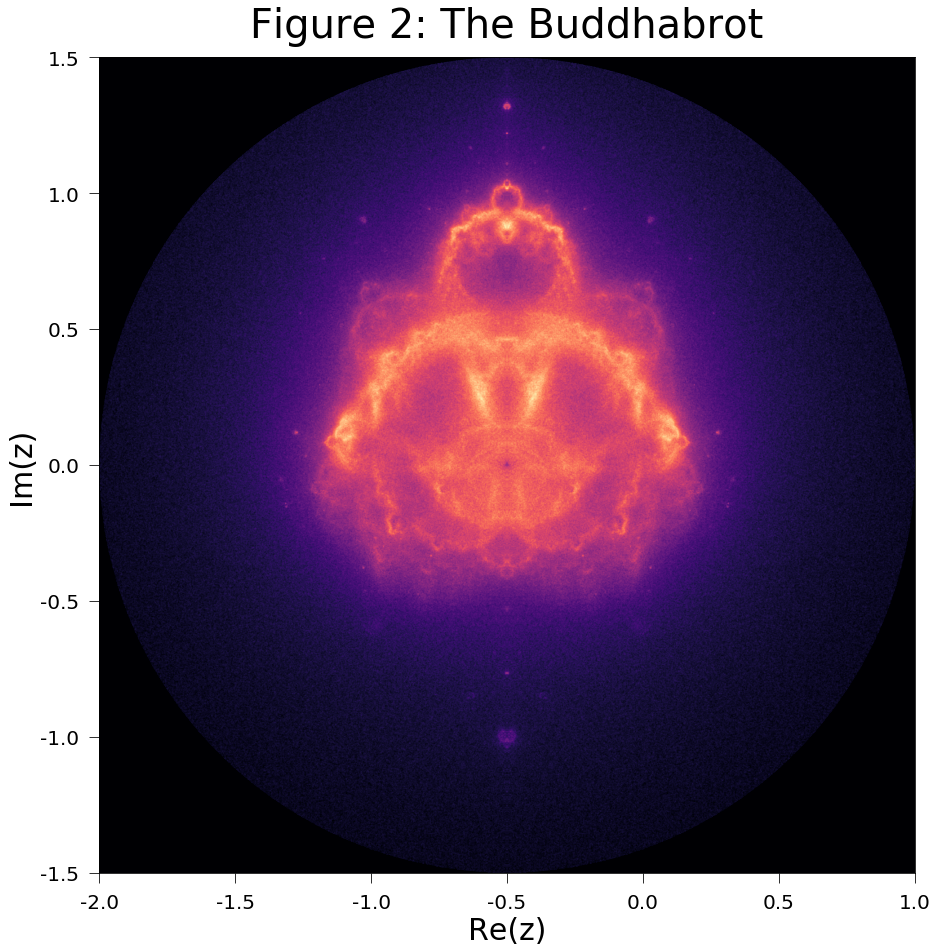

In [63]:
fig = plt.figure(figsize=(size,size))
plt.imshow(B.T**0.5,cmap='magma',interpolation='gaussian',aspect='equal',vmin=2)
plt.xlabel('Re(z)',fontsize=30)
plt.ylabel('Im(z)',fontsize=30)
plt.xticks([i*n/6-0.5 for i in range(7)],[i for i in np.arange(-2,1.5,0.5)],fontsize=20)
plt.yticks([i*n/6-0.5 for i in range(7)],[i for i in np.arange(1.5,-2,-0.5)],fontsize=20)
plt.tick_params(pad=10,length=10)
plt.title('Figure 2: The Buddhabrot',fontsize=40,pad=20)
fig.patch.set_facecolor('white')
fig.show()